# Analysing & Predicing Suicide Rates Around The Globe

* The objective of this model is to predict the rate of suicide by age.
* Following the Exploratory Data Analysis, we will be using Regression models to predict.
* This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

# References

* United Nations Development Program (2018).
  Human development index (HDI). 
  fRetrieved from http://hdr.undp.org/en/indicators/137506

* World Bank (2018). World development indicators: GDP (current US$) by country:1985 to 2016. 
  Retrieved from http://databank.worldbank.org/data/source/world-development-indicators
  Suicide in the Twenty-First Century [dataset]. 
  Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook
  World Health Organization (2018). Suicide prevention. 
  Retrieved from http://www.who.int/mental_health/suicide-prevention/en/
  



# Bigger Picture & Objective

* Our unified effort to prevent suicide & loss of meaning in one's life.
* We have two ways to look at life: Optimistically/Pessimistically & Nihilistically.
* No one knows the meaning of life & the existential question is an open one.
* We can either be happy & cool about not knowing anything or unhappy about not knowing anything.
* Finding ways to cultivate cooperation & empathy among the population is necessary.

# If you know someone around you or close to you going through a difficult time, please reach out & be present.

> I hope you are okay.
> 
> Don't give up.
> 
> The darkest night is just before dawn.
> 
> You'll never know what would've happened if you stuck it out & push through it.
> 
> The process shapes you before success rewards you.
> 
> Be strong.
> 
> I'm proud of you for making it this far. 
> Let's keep going! ❤️ 🔥

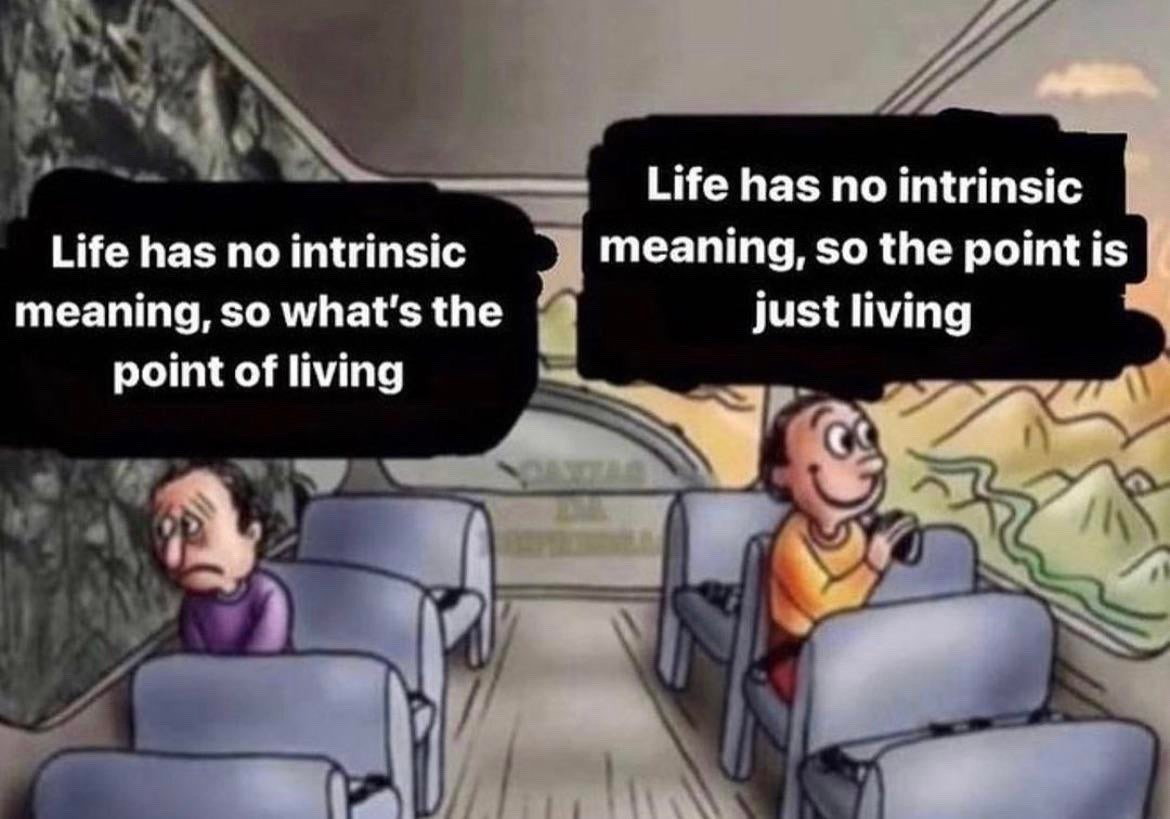

# Importing essential libraries 

In [1]:
# Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


# Exploratory Data Analysis 

In [2]:
# Create a DataFrame

df = pd.read_csv("/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv")

In [3]:
# Viewing the DataFrame
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [5]:
# Total number of rows 
len(df)

27820

In [6]:
df.shape

(27820, 12)